In [7]:
## Using 6m Smoked Mice Fibroblasts object to demonstrate how to correlate cells to a marker signature
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb
import ma_codes as codes
from ma_codes import mymap

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

Running Scanpy 1.5.2.dev5+ge5d246aa, on 2020-06-01 16:40.


In [2]:
## Set global plotting parameters
sc.set_figure_params(vector_friendly = True)
plt.rcParams["figure.figsize"] = (6, 5)
sb.set_style("ticks")

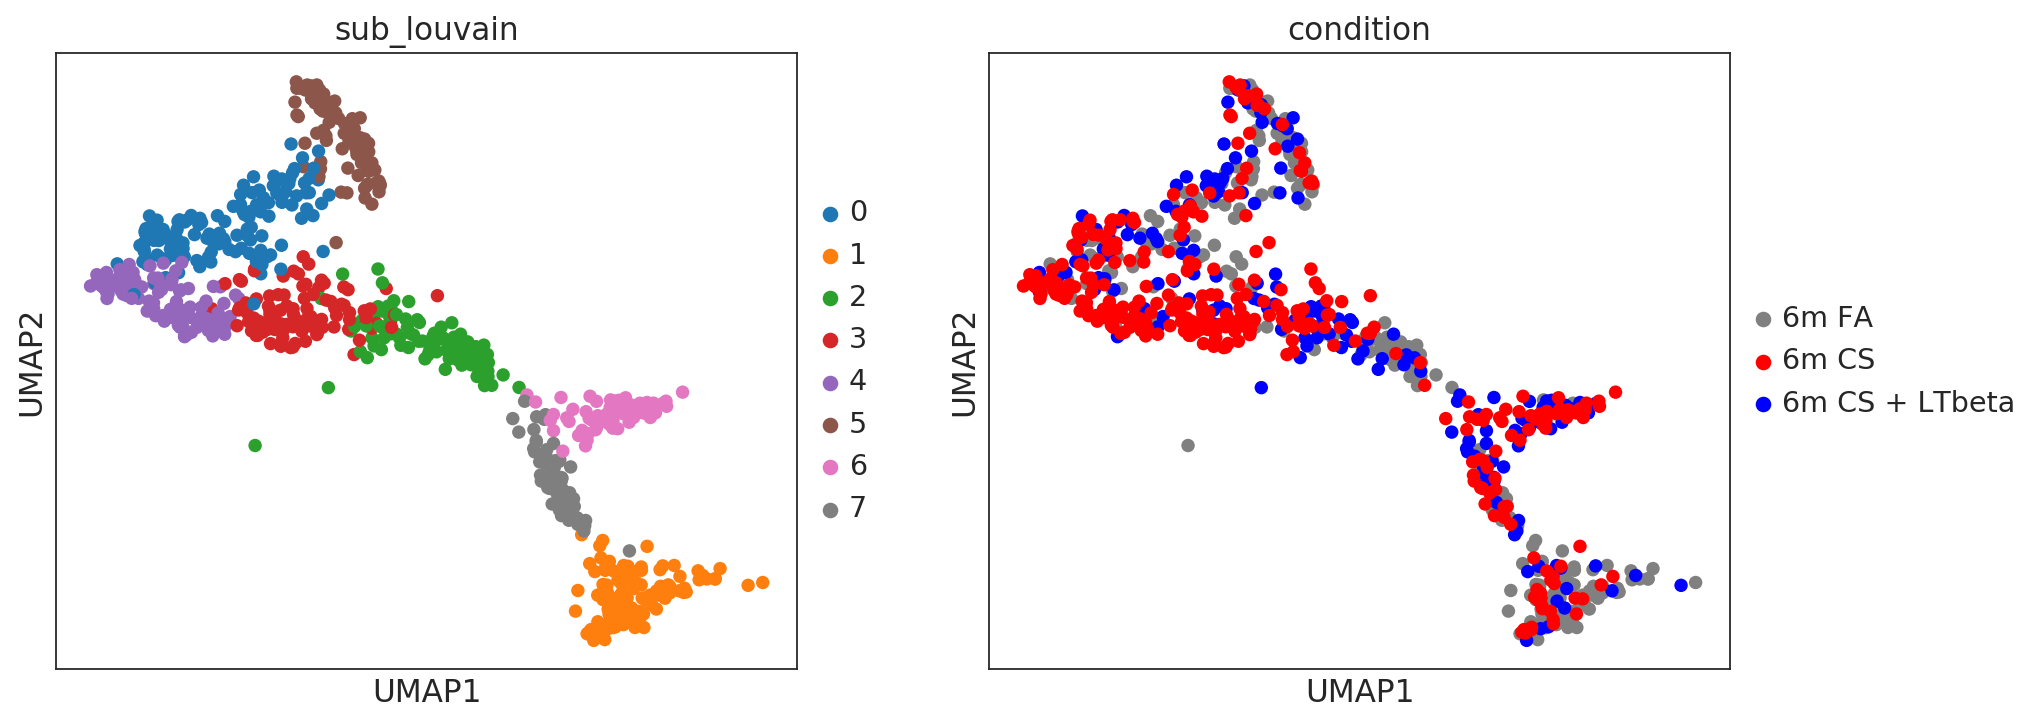

In [3]:
## Load Fibroblast subset
folder = "/media/agando/206c956b-9fe0-492c-b181-e920c87f2401/Projects/200204_SmokedMice_Revision/"
sub = sc.read(folder + "200528_Smoked_Mice_6m_Fibroblasts.h5ad")
sc.pl.umap(sub, color = ["sub_louvain", "condition"])

### Correlation to given Marker Signatures

In [4]:
folder = "/home/agando/Documents/GitHub/Code_Repository/Python/output/"
marker = pd.read_csv(folder + "Mesenchyme_allMarkers.txt", sep = "\t")
marker.head()

,gene,score,logfoldchange,pval,pval_adj,cluster
0,Enpp2,33.933918,3.843185,2.106431e-252,4.084791e-248,Hhip cells
1,Rgs2,32.779194,3.141313,1.165622e-235,1.130187e-231,Hhip cells
2,Aspn,31.197956,4.060936,1.135700e-213,7.341167e-210,Hhip cells
3,Mustn1,26.960613,3.174977,4.283427e-160,2.076605e-156,Hhip cells
4,P2ry14,24.356833,4.564451,4.907339e-131,1.586052e-127,Hhip cells


In [5]:
marker.cluster.value_counts()

Pericytes            500
Hhip cells           500
Lipofibroblasts      500
Matrixfibroblasts    500
Myofibroblasts       500
SMCs                 500
Name: cluster, dtype: int64

### Decide on cell type and thresholds (logfoldchange, pvalue) to use more stringent genes for correlation score

279 genes used for correlation score to Lipofibroblasts


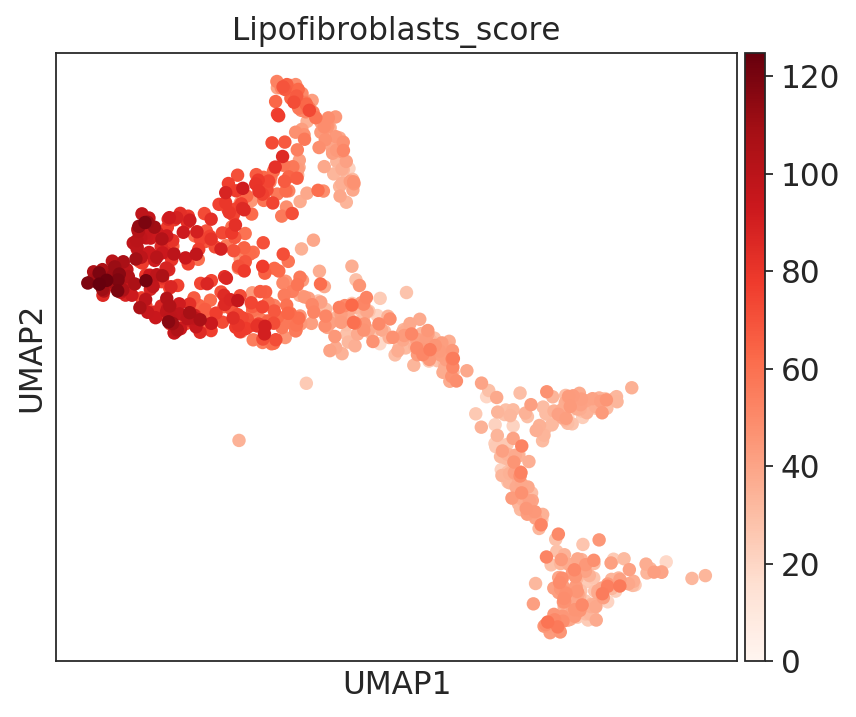

In [8]:
## Might have to adjust the _label parameters if the columns in your table have different names
cell_type = "Lipofibroblasts"
s_name = "%s_score" %cell_type

sub.obs[s_name] = codes.correlate_to_signature(sub, marker, logFC_thresh = 0.7, cell_type = cell_type, 
                                               cell_type_label = "cluster", logFC_label = "logfoldchange", 
                                               gene_label = "gene", use_raw = True)
sc.pl.umap(sub, color = s_name, cmap = mymap, vmin = 0)

### Visualize the correlation score per cluster

No handles with labels found to put in legend.


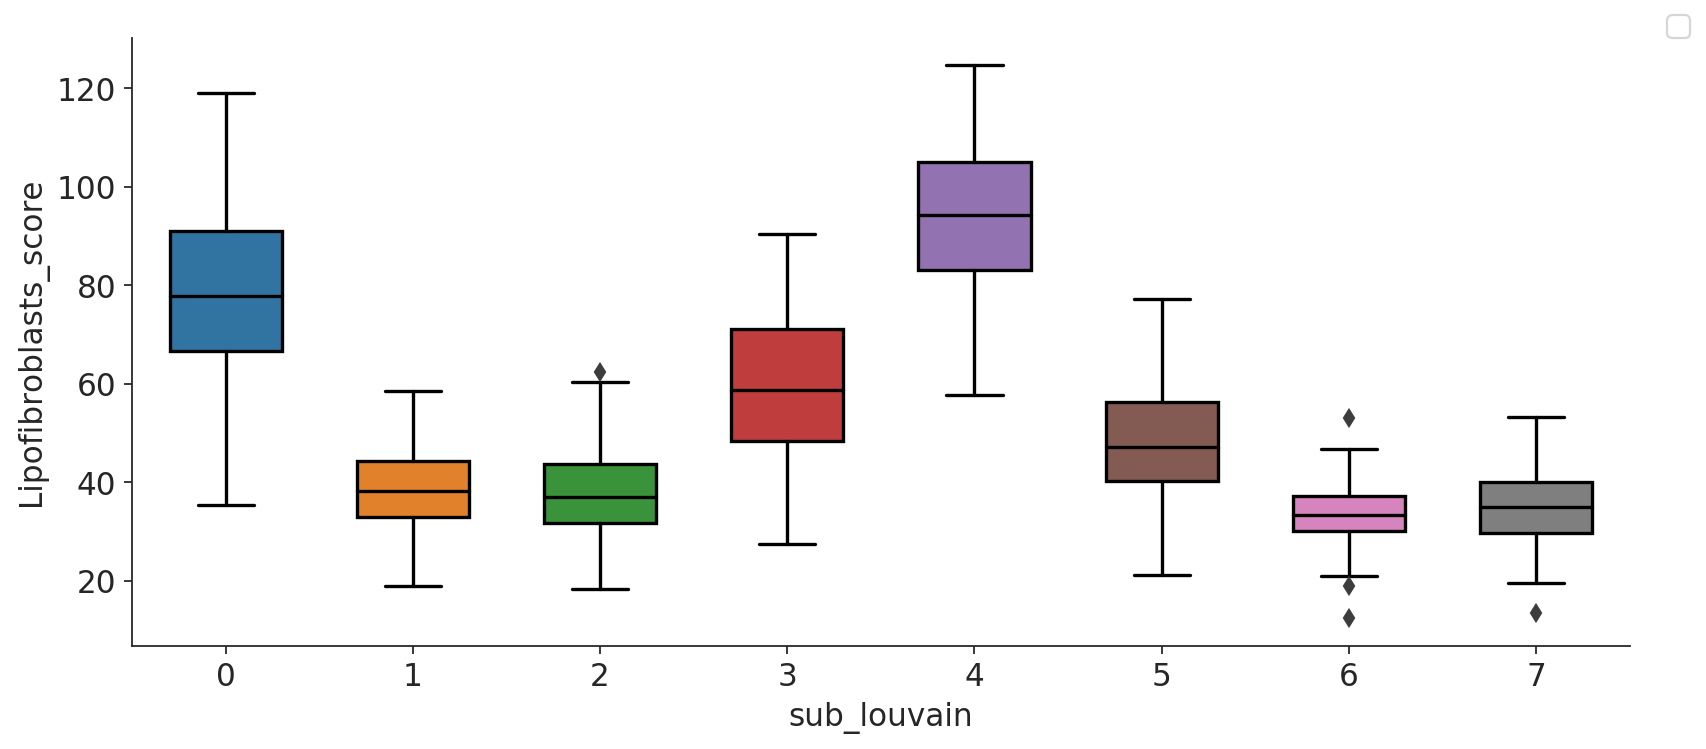

In [18]:
xlabel = "sub_louvain"       ## where cluster information is stored
cols = sub.uns["%s_colors" %xlabel]

score = sc.get.obs_df(sub, keys = [s_name, xlabel], layer = None, use_raw = True)
codes.plot_gene_boxplot(score, score = s_name, xlabel = xlabel, figsize = (12, 5), palette = cols, width = 0.6)

### Additionally split each cluster by condition

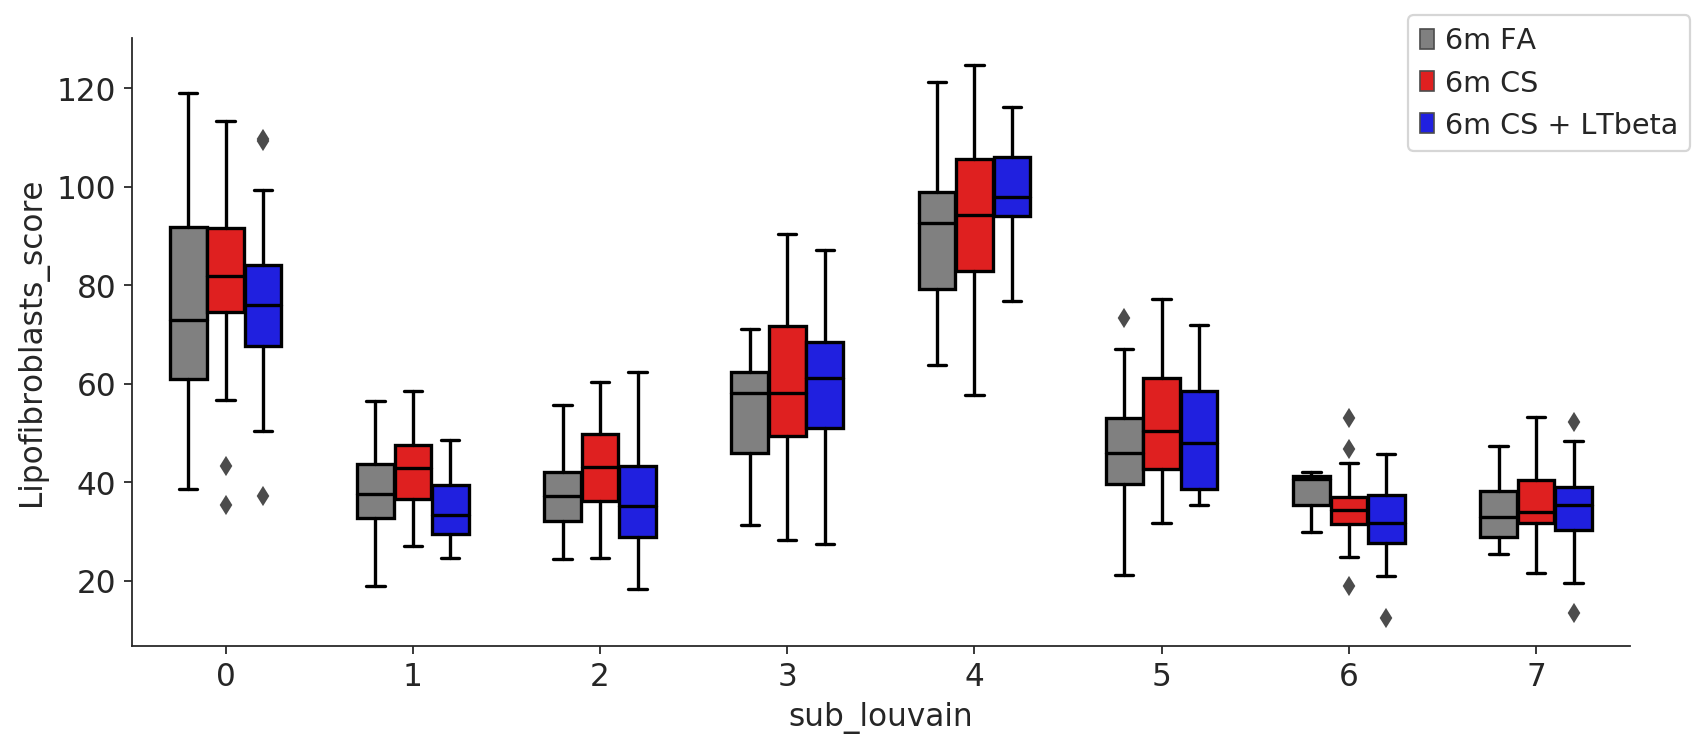

In [20]:
xlabel = "sub_louvain"       ## where cluster information is stored
condition = "condition"      ## split boxes by this column

score = sc.get.obs_df(sub, keys = [s_name, condition, xlabel], layer = None, use_raw = True)
codes.plot_gene_boxplot(score, score = s_name, xlabel = xlabel, figsize = (12, 5), condition = condition,
                        palette = ["gray", "red", "blue"], width = 0.6, legend = True)